# Run Baseline Models on 2018 Data
#### 9/26/2020
---

## Load and Process Dataset
### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.decomposition import PCA
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
warnings.filterwarnings('ignore')

### Read in data

In [2]:
df = pd.read_csv('2018_mapped_processed_buckets.csv').sample(frac=1)
df.head()

,Age,class-worker,education,marital-status,occupation,relationship,race,sex,extra-income,hours-per-week,place-of-birth,income
411402,69,Private-prof,bachelor,Married,SAL-Retail Salespersons,spouse,white-alone,female,0.0,38.0,Kansas/KS,"\$25,000-$49,999"
747521,44,Private-prof,master,Married,CMM-Computer Programmers,ref,asian-alone,male,0.0,40.0,Laos,"\$125,000-$149,999"
498761,47,Private-prof,some-college-great1,Separated,"PRS-Hairdressers, Hairstylists, And Cosmetolog...",ref,white-alone,female,0.0,20.0,Cuba,"\$1,000-$24,999"
682483,19,Private-prof,HSgrad,Never-married,TRN-Driver/Sales Workers And Truck Drivers,child,white-alone,male,0.0,10.0,Connecticut/CT,"\$1,000-$24,999"
522201,48,Private-nonprof,HSgrad,Married,TRN-Driver/Sales Workers And Truck Drivers,spouse,white-alone,male,0.0,55.0,Kentucky/KY,"\$50,000-$74,999"


In [3]:
df.isnull().sum()

Age               0
class-worker      0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
extra-income      0
hours-per-week    0
place-of-birth    0
income            0
dtype: int64

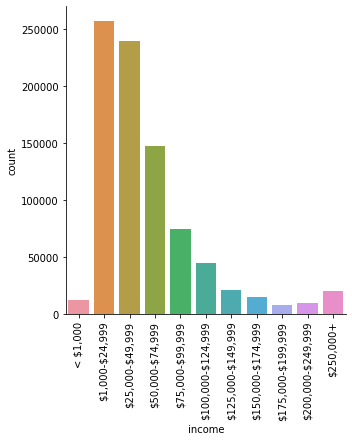

In [6]:
chart = sns.catplot(x="income", kind="count", data=df, order = ['< $1,000', '\$1,000-$24,999', '\$25,000-$49,999', '\$50,000-$74,999', '\$75,000-$99,999', '\$100,000-$124,999', '\$125,000-$149,999', '\$150,000-$174,999', '\$175,000-$199,999', '\$200,000-$249,999', '$250,000+'])
chart.set_xticklabels(rotation=90)



In [7]:
len(df)*.2

169430.2

In [8]:
#subset the data into test and training data and labels
df_test_data = df.drop(columns=['income'])[:200000]
df_test_labels = df[['income']][:200000]
df_train_data = df.drop(columns=['income'])[200000:]
df_train_labels = df[['income']][200000:]

In [9]:
len(df_test_data)

200000

In [10]:
df_test_data.head()

,Age,class-worker,education,marital-status,occupation,relationship,race,sex,extra-income,hours-per-week,place-of-birth
411402,69,Private-prof,bachelor,Married,SAL-Retail Salespersons,spouse,white-alone,female,0.0,38.0,Kansas/KS
747521,44,Private-prof,master,Married,CMM-Computer Programmers,ref,asian-alone,male,0.0,40.0,Laos
498761,47,Private-prof,some-college-great1,Separated,"PRS-Hairdressers, Hairstylists, And Cosmetolog...",ref,white-alone,female,0.0,20.0,Cuba
682483,19,Private-prof,HSgrad,Never-married,TRN-Driver/Sales Workers And Truck Drivers,child,white-alone,male,0.0,10.0,Connecticut/CT
522201,48,Private-nonprof,HSgrad,Married,TRN-Driver/Sales Workers And Truck Drivers,spouse,white-alone,male,0.0,55.0,Kentucky/KY


### Pre-process categorical variables

In [11]:
cat_var = ['class-worker', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'place-of-birth']
for f in cat_var:
    enc = preprocessing.LabelEncoder()
    df_train_data[f] = enc.fit_transform(df_train_data[f])
    df_test_data[f] = enc.transform(df_test_data[f])

In [12]:
scaler = preprocessing.StandardScaler()
df_train_data = pd.DataFrame(scaler.fit_transform(df_train_data), columns = df_train_data.columns)
df_test_data = pd.DataFrame(scaler.transform(df_test_data), columns = df_train_data.columns)

## Train Models

### K-Nearest Neighbors

In [13]:
results = []
for k in [1, 2, 3, 4, 5, 6, 7, 8, 9]:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(df_train_data, df_train_labels)
    acc = knn_model.score(df_test_data, df_test_labels)
    results.append([k, acc])

In [14]:
results

[[1, 0.38007],
 [2, 0.38059],
 [3, 0.387585],
 [4, 0.40621],
 [5, 0.417785],
 [6, 0.42092],
 [7, 0.424195],
 [8, 0.42925],
 [9, 0.431265]]

### Bernoulli NB

In [15]:
results = []
for a in [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0, 100.0]:
  bnb_model = BernoulliNB(alpha=a)
  bnb_model.fit(df_train_data, df_train_labels)
  acc = bnb_model.score(df_test_data, df_test_labels)
  results.append([a, acc])

In [16]:
results

[[0.0, 0.41467],
 [0.0001, 0.41467],
 [0.001, 0.41467],
 [0.01, 0.41467],
 [0.1, 0.41467],
 [0.5, 0.414675],
 [1.0, 0.414675],
 [2.0, 0.414675],
 [10.0, 0.414675],
 [100.0, 0.414565]]

### Linear Regression

In [17]:
df_train_label_dummy = pd.get_dummies(df_train_labels['income'], prefix='income')
df_test_label_dummy = pd.get_dummies(df_test_labels['income'], prefix='income')

In [18]:
linear_model = LinearRegression()
linear_model.fit(df_train_data, df_train_label_dummy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
lm_predicted = linear_model.predict(df_test_data)
r2 = linear_model.score(df_test_data, df_test_label_dummy)
r2

0.08784054583827278

In [20]:
def get_linear_model_accuracy(predicted, actual):
    df_predicted = pd.DataFrame(columns = actual.columns)
    results = []
    for i in range(len(predicted)):
        it = predicted[i]
        add = [0, 0]
        add[it.argmax()] = 1
        df_predicted.loc[i] = add
  
    for r in range(len(df_predicted)):
        results.append(np.array_equal(df_predicted.iloc[r].values, actual.iloc[r].values))
  
    return(results.count(True) / len(results))

In [21]:
get_linear_model_accuracy(lm_predicted, df_test_label_dummy)

IndexError: list assignment index out of range

### Logistic Regression

In [22]:
results = []
for c in [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0, 100.0]:
    log_model = LogisticRegression(C=c)
    log_model.fit(df_train_data, df_train_labels)
    acc = log_model.score(df_test_data, df_test_labels)
    results.append([c, acc])

In [23]:
results

[[0.0001, 0.41538],
 [0.001, 0.420405],
 [0.01, 0.4218],
 [0.1, 0.421895],
 [0.5, 0.421845],
 [1.0, 0.421935],
 [2.0, 0.422015],
 [10.0, 0.421795],
 [100.0, 0.421855]]